In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pdata=pd.read_csv("StudentsPerformance.csv")
pdata

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
pdata.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
pdata.dtypes.value_counts()

object    5
int64     3
dtype: int64

In [6]:
score

,writing score,reading score,math score
0,74,72,72
1,88,90,69
2,93,95,90
3,44,57,47
4,75,78,76
...,...,...,...
995,95,99,88
996,55,55,62
997,65,71,59
998,77,78,68


In [6]:
score=pdata[['writing score','reading score','math score']]
pdata['TotalScore']=score.sum(axis=1)
pdata

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,TotalScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


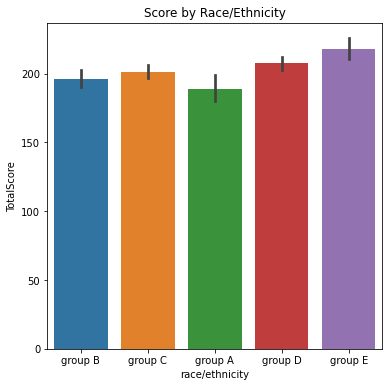

In [7]:
# Barplot
plt.figure(figsize = (6, 6))
sns.barplot(x = 'race/ethnicity', y = 'TotalScore', data = pdata)
plt.title('Score by Race/Ethnicity')
plt.show()

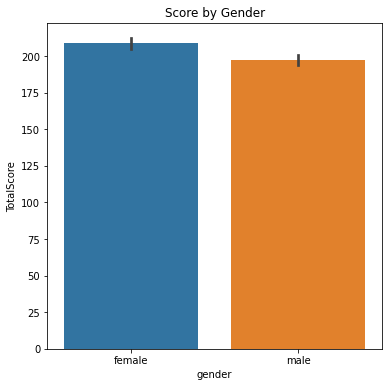

In [21]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'gender', y = 'TotalScore', data = pdata)
plt.title('Score by Gender')
plt.show()

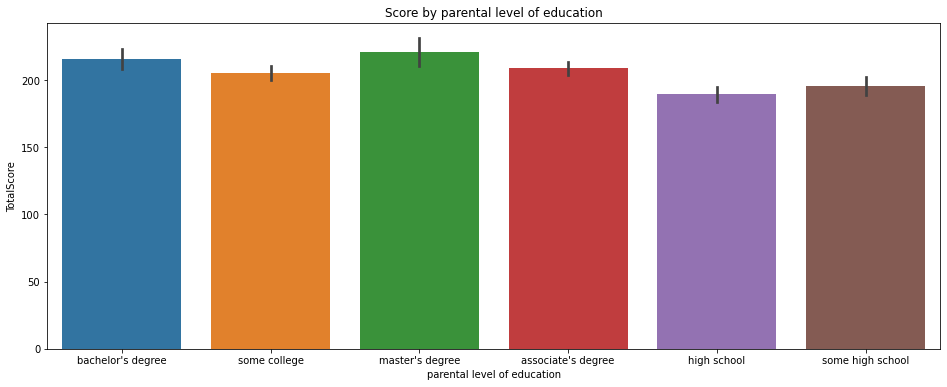

In [24]:
plt.figure(figsize = (16, 6))
sns.barplot(x = 'parental level of education', y = 'TotalScore', data = pdata)
plt.title('Score by parental level of education')
plt.show()

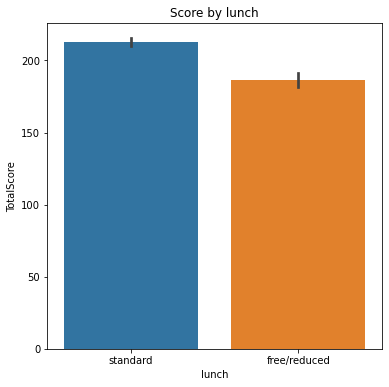

In [25]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'lunch', y = 'TotalScore', data = pdata)
plt.title('Score by lunch')
plt.show()

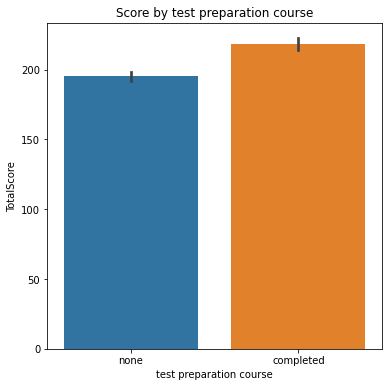

In [26]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'test preparation course', y = 'TotalScore', data = pdata)
plt.title('Score by test preparation course')
plt.show()

In [27]:
pdata['TotalScore'].describe()

count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: TotalScore, dtype: float64

# Encoding nominal variable

In [8]:
# Pandas get_dummies approach
gen=pd.get_dummies(pdata['gender'])
gen

,female,male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
995,1,0
996,0,1
997,1,0
998,1,0


In [9]:
pdata1=pd.concat([pdata,gen],axis=1)
pdata1.drop(['gender','female'],inplace=True,axis=1)
pdata1.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,TotalScore,male
0,group B,bachelor's degree,standard,none,72,72,74,218,0
1,group C,some college,standard,completed,69,90,88,247,0
2,group B,master's degree,standard,none,90,95,93,278,0
3,group A,associate's degree,free/reduced,none,47,57,44,148,1
4,group C,some college,standard,none,76,78,75,229,1


# using OneHotEncoder

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse=False)

In [11]:
gen2=ohe.fit_transform(pdata[['gender']])
ohe.categories_

[array(['female', 'male'], dtype=object)]

In [12]:
gen2

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],

# Encoding ordinal variable

In [14]:
print(pdata['parental level of education'].unique().tolist())
c=['some high school','high school','some college',"associate's degree","bachelor's degree","master's degree"]

["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']


# OrdinalEncoder

In [15]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[c])

In [16]:
edu=oe.fit_transform(pdata[['parental level of education']])
oe.categories_

[array(['some high school', 'high school', 'some college',
        "associate's degree", "bachelor's degree", "master's degree"],
       dtype=object)]

In [18]:
edu[:5]

array([[4.],
       [2.],
       [5.],
       [3.],
       [2.]])

In [19]:
pdata['parental level of education'].head()

0     bachelor's degree
1          some college
2       master's degree
3    associate's degree
4          some college
Name: parental level of education, dtype: object

# ColumnTransformer

In [17]:
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('ohe',OneHotEncoder(drop='first'),['gender', 'race/ethnicity', 'lunch', 'test preparation course']),
                     ('oe',OrdinalEncoder(categories=[c]),['parental level of education'])],remainder='passthrough')

In [18]:
pdata3=ct.fit_transform(pdata)
pdata3[:5]

array([[  0.,   1.,   0.,   0.,   0.,   1.,   1.,   4.,  72.,  72.,  74.,
        218.],
       [  0.,   0.,   1.,   0.,   0.,   1.,   0.,   2.,  69.,  90.,  88.,
        247.],
       [  0.,   1.,   0.,   0.,   0.,   1.,   1.,   5.,  90.,  95.,  93.,
        278.],
       [  1.,   0.,   0.,   0.,   0.,   0.,   1.,   3.,  47.,  57.,  44.,
        148.],
       [  1.,   0.,   1.,   0.,   0.,   1.,   1.,   2.,  76.,  78.,  75.,
        229.]])

In [19]:
pdata.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,TotalScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


# Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

In [21]:
le.classes_

array(['amsterdam', 'paris', 'tokyo'], dtype='<U9')

In [22]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])

In [23]:
le.inverse_transform([2, 2, 1])

array(['tokyo', 'tokyo', 'paris'], dtype='<U9')